# Correlation Between anti-lgbtq hatecrimes and legislation passed
* Where did we get this data?
    1. FBI hate crimes database from this link: 
        https://cde.ucr.cjis.gov/
    2. ACLU's legislation tracker from this link: 
        https://www.aclu.org/legislation-affecting-lgbtq-rights-across-country-2021
* Defintions we must make: 
    * for more inforamtion about what classifies as a hatecrime in addition to how data collection was made, please refer to the fbi database linked above
    * in addition we must clarify the defintion for religious exemption bills:
        - these bills allow the exemption of discrimination based on the belief of religion, for example: a woman was fired from work because of religious exemption, being she was pregnant before getting married, not abiding to organization's religious beliefs
    * bills preempting protection:
        - according to the ACLU, 'These bills prevent cities and other local government entities from passing nondiscrimination protections that are more expansive than the protections offered at the state level, including protections for LGBTQ people.'
* Possible predictor values: 
    1. number of ACLU flagged anti-lgbtq legislation passed (maybe per state)
    2. 2020 presidential election results (dem or rep) 
    3. senate/house majority of state
* Possible Response values:
    1. lgbtq hatecrime incidents/offenses
    2. lgbtq hatecrime percentage of all hatecrimes per state
* Data Table Variable Names:
    * crimesByBias <- fbi table 1 hate crimes by bias, basically summarizes number of offenses/victims with bias incidents
        * more notes: 
        * "1 The term victim may refer to an individual, business/financial institution, government entity, religious organization, or society/public as a whole.",,,,
        * "2 The term known offender does not imply the suspect's identity is known; rather, the term indicates some aspect of the suspect was identified, thus distinguishing the suspect from an unknown offender.",,,,
        * 3 A multiple-bias incident is an incident in which one or more offense types are motivated by two or more biases.,,,,

    * typeOfCrime <- type of crimes committed upon each bias group (ex: assault, manlsaughter, rape, intimidation, etc. 
        * 1 The figures shown include additional offenses collected in the National Incident-Based Reporting System. See the downloadable Methodology file for further explanation.															
        * 2 A multiple-bias incident is an incident in which one or more offense types are motivated by two or more biases.
    * crimeVictims <- shows types of victims (adult/juvenile), and number of victims per crime
        * 1 The term victim may refer to an individual, business/financial institution, government entity, religious organization, or society/public as a whole.																	
        * 2 The figures shown are individual victims only.																	
        * 3 The figures shown include additional offenses collected in the National Incident-Based Reporting System. See the downloadable Methodology file for further explanation.																	
        * 4 A multiple-bias incident is an incident in which one or more offense types are motivated by two or more biases.																	
        * Note: The aggregate of adult and juvenile individual victims does not equal the total number of victims because total victims include individuals, businesses/financial institutions, government entities, religious organizations, and society/public as a whole. In addition, the aggregate of adult and juvenile individual victims does not equal the aggregate of victims of crimes against persons because not all law enforcement agencies report the ages of individual victims.
    * crimeLocation <- shows location of where the crime happened (on school grounds, public, business, etc)
        * 1 A multiple-bias incident is an incident in which one or more offense types are motivated by two or more biases.								
        * 2 The location designation School/college has been retained for agencies that have not updated their records management systems to include the new location designations of Schoolâ€”college/university and Schoolâ€”elementary/secondary, which allow for more specificity in reporting.	
    * crimeState <- shows crime by state and city
        * 1 Population figures are published only for the cities. The figures listed for the universities and colleges are student enrollment and were provided by the United States Department of Education for the 2020 school year, the most recent available. The enrollment figures include full-time and part-time students.													
        * 2 The figures shown include one incident reported with more than one bias motivation.													
        * 3 Student enrollment figures were not available.
    * antiLgbtq <- shows amount of anti-LGBTQ and trans laws 
    * religiousExemption <- shows amount of bills passed from relgiious exemption (see definition above)
    * preemptingProtection <- shows amount of bills preempting LGBTQ protection (see definition above) 
    * lgbtqEquality <- shows bills passed to protect LGBTQ rights

In [2]:
#var names for kaggle:
crimesByBias <- read.csv('fbit1crimesByBias.csv')
typeOfCrime <- read.csv('fbit4crimesByBiasMotivation.csv')
crimeVictims <- read.csv('fbit7_Victims_Offense_Type_by_Bias_Motivation_2021.csv')
crimeLocation <- read.csv('fbit10incidents_Bias_Motivation_by_Location_2021.csv')
crimeTypeByState <-read.csv('fbit11crimeTypeByState.csv')
crimeState <- read.csv("fbit13.csv")
antiLgbtq <-  read.csv('AntiLGBTQ.csv')
religiousExemption <- read.csv('ReligiousExemptionBills.csv')
preemptingProtection <- read.csv('BillsPreemptingProtection.csv')
lgbtqEquality <- read.csv('LGBTQequality.csv')

In [3]:
#cleaning data frames KIND OF
# Fbi data
crimesByBias <- data.frame(c=crimesByBias)
colnames(crimesByBias) <-c('Bias_Motivation','Incidents','Offenses','Victims','Known_Offenders')
typeOfCrime <- data.frame(c=typeOfCrime)
colnames(typeOfCrime) <-c('Bias_Motivation','Total_Offenses','Murder_and_nonnegligent_manslaughter',
                          'Rape','Aggravated_Assault','Simple Assault','Intimidation','Other','Robbery', 'Burgalry', 
                          'Larceny','Motor_Vehicle_Theft', 'Arson','Destruction/Damage/Vandalism','Other','Crimes_against_society')
typeOfCrime<- typeOfCrime[6:47,]
crimeVictims <- data.frame(c=crimeVictims)
colnames(crimeVictims) <- c('Bias_Motivation','Total_Victims','Total_Adult_Victims','Total_Juvenile_Victims',
                            'Murder_and_nonnegligent_manslaughter','Rape','Aggravated_Assault','Simple Assault','Intimidation','Other','Robbery', 'Burgalry', 
                          'Larceny','Motor_Vehicle_Theft', 'Arson','Destruction/Damage/Vandalism','Other','Crimes_against_society')
crimeVictims <- crimeVictims[6:48,]
crimeLocation <- data.frame(c=crimeLocation)
colnames(crimeLocation) <- c('Location','Total_Incidents','Race/Ethnicity/Ancestry','Religion',
                             'Sexual_Orientation','Disability','Gender','Gender_Identity','Multiple_bias_incidents')
crimeLocation <- crimeLocation[6:53,]
crimeTypeByState <-data.frame(c=crimeTypeByState)
colnames(crimeTypeByState) <- c('State','Total_Offenses','Murder_and_nonnegligent_manslaughter','Rape','Aggravated_Assault','Simple Assault','Intimidation','Other','Robbery', 'Burgalry', 
                          'Larceny','Motor_Vehicle_Theft', 'Arson','Destruction/Damage/Vandalism','Other','Crimes_against_society')
crimeTypeByState <- crimeTypeByState[6:57,]
crimeState <- data.frame(c=crimeState)
colnames(crimeState) <- c('State','Race/Ethnicity/Ancestry','Religion',
                         'Sexual_Orientation','Disability','Gender','Gender_Identity')
crimeState <-crimeState[1:51,]
#ACLU Data
antiLgbtq <- data.frame(c=antiLgbtq)
antiLgbtq <-antiLgbtq[0:3]
colnames(antiLgbtq) <-c('State','Bill_Number','Status')
religiousExemption <- data.frame(c=religiousExemption)
religiousExemption <-religiousExemption[0:3]
colnames(religiousExemption) <-c('State','Bill_Number','Status')
preemptingProtection <- data.frame(c=preemptingProtection)
preemptingProtection <- preemptingProtection[0:3]
colnames(preemptingProtection) <-c('State','Bill_Number','Status')
lgbtqEquality <- data.frame(c=lgbtqEquality)
lgbtqEquality<-lgbtqEquality[0:3]
colnames(lgbtqEquality) <-c('State','Bill_Number','Status')

In [4]:
hatecrimes <-crimeState
hatecrimes$sum <- rowSums(hatecrimes[,c(2:7)])
head(hatecrimes)
plt <-hatecrimes
plt <-plt[,-c(2,3,4,5,6,7)]
summary(plt)
na.omit(hatecrimes)

State,Race/Ethnicity/Ancestry,Religion,Sexual_Orientation,Disability,Gender,Gender_Identity,sum
Alabama,137,72,32,5,5,4,255
Alaska,5,0,4,0,2,1,12
Arizona,61,15,16,0,0,4,96
Arkansas,31,3,9,0,3,2,48
California,49,6,16,0,0,3,74
Colorado,182,40,67,4,1,18,312


        State         sum        
 Alabama   : 1   Min.   :  1.00  
 Alaska    : 1   1st Qu.: 44.75  
 Arizona   : 1   Median :101.50  
 Arkansas  : 1   Mean   :152.60  
 California: 1   3rd Qu.:222.25  
 (Other)   :45   Max.   :651.00  
 NA's      : 1   NA's   :1       

State,Race/Ethnicity/Ancestry,Religion,Sexual_Orientation,Disability,Gender,Gender_Identity,sum
Alabama,137,72,32,5,5,4,255
Alaska,5,0,4,0,2,1,12
Arizona,61,15,16,0,0,4,96
Arkansas,31,3,9,0,3,2,48
California,49,6,16,0,0,3,74
Colorado,182,40,67,4,1,18,312
Connecticut,65,9,17,1,0,0,92
Delaware,5,2,2,0,0,0,9
Florida,1,0,0,0,0,0,1
Georgia,164,29,37,3,3,12,248


In [5]:
hatecrimes[9,]

,State,Race/Ethnicity/Ancestry,Religion,Sexual_Orientation,Disability,Gender,Gender_Identity,sum
9,Florida,1,0,0,0,0,0,1


In [6]:
reportingStates <- read_csv('/kaggle/input/hatecrimeproject/reportingStates.csv')
reportingStates

ERROR: Error in read_csv("/kaggle/input/hatecrimeproject/reportingStates.csv"): could not find function "read_csv"


In [7]:
merged[9,]

ERROR: Error in eval(expr, envir, enclos): object 'merged' not found


fbi tables:
- crimeByBias
- typeOfCrime
- crimeVictims
- crimeLocation
- crimeTypeByState
- crimeState


ACLU tables:
- antiLgbtq
- religiousExemption
- preemptingProtection
- lgtbqEquality

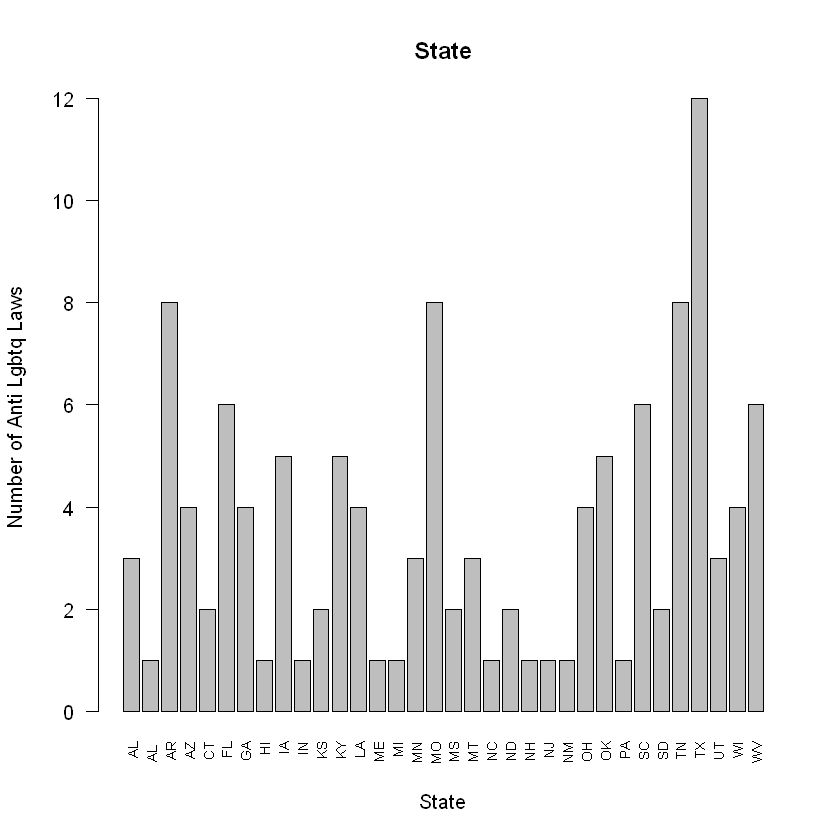

In [8]:
counts <- table(antiLgbtq$State)
barplot(counts, main='State', xlab = 'State', ylab='Number of Anti Lgbtq Laws',las = 2,cex.names = 0.7)
#antiLgbtq

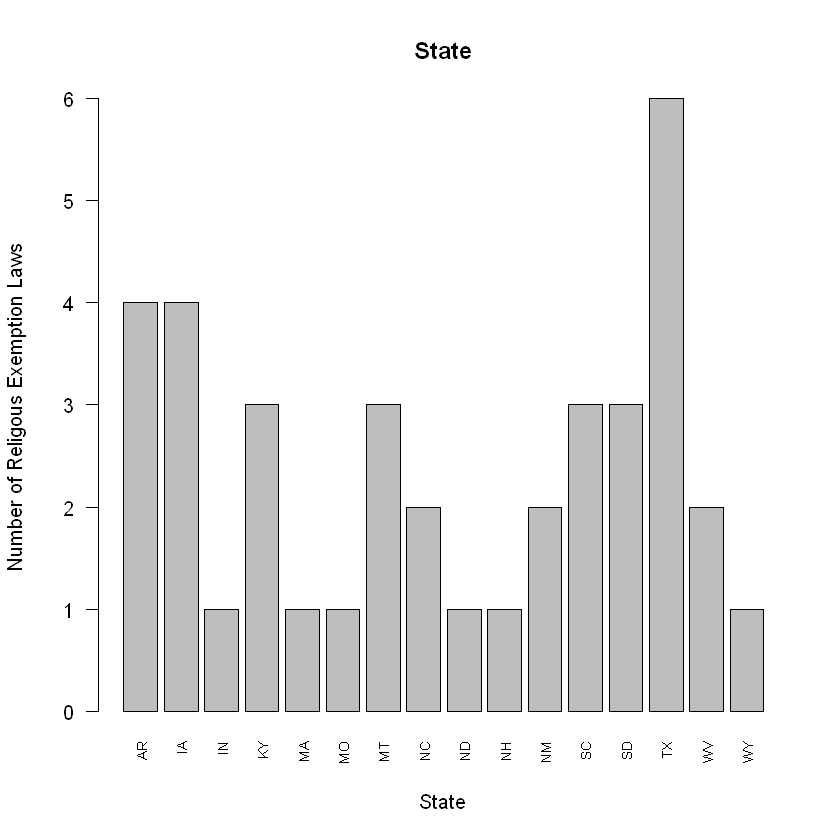

In [9]:
counts <- table(religiousExemption$State)
barplot(counts, main='State', xlab = 'State', ylab='Number of Religous Exemption Laws',las = 2,cex.names = 0.7)

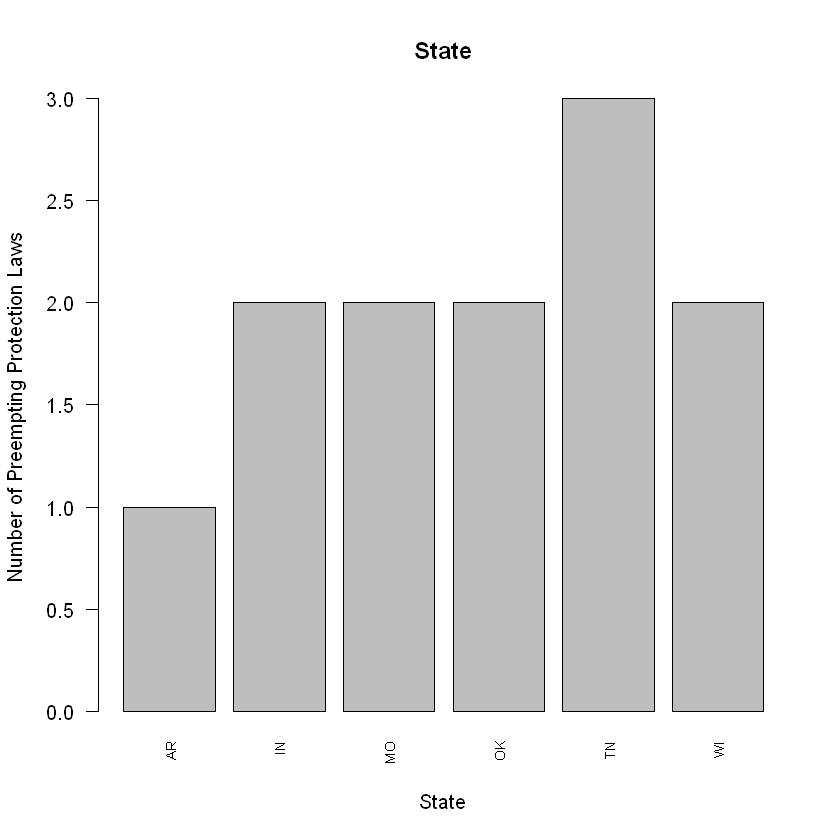

In [10]:
counts <- table(preemptingProtection$State)
barplot(counts, main='State', xlab = 'State', ylab='Number of Preempting Protection Laws',las = 2,
        cex.names = 0.7)

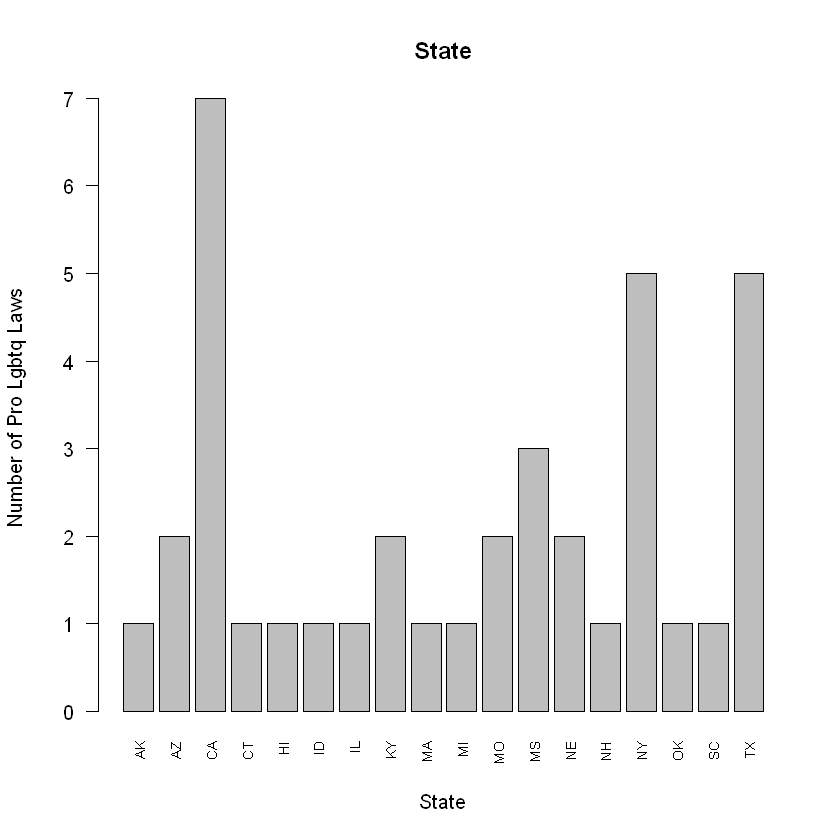

In [11]:
counts <- table(lgbtqEquality$State)
barplot(counts, main='State', xlab = 'State', ylab='Number of Pro Lgbtq Laws',las = 2,
        cex.names = 0.7)

In [ ]:
head(crimeState)
fix(crimeState)

In [ ]:
names(crimeState)

In [ ]:
crimeState <- na.omit(crimeState)

Data aggregation

In [ ]:
dataset1 <- crimeState
drop <- c("Race/Ethnicity/Ancestry", "Religion", "Disabilitiy")
dataset1 <- dataset1[,!(names(dataset1) %in% drop)]
# now we count the bills for each category from ACLU and then add it to the dataset1 respective to State
antiLgbtqFreq<- data.frame(table(antiLgbtq$State))
religiousExemptionFreq <- data.frame(table(religiousExemption$State))
preemptingProtectionFreq <-data.frame(table(preemptingProtection$State))
lgbtqEqualityFreq <-data.frame(table(lgbtqEquality$State))
#antiLgbtqFreq
colnames(antiLgbtqFreq) <- ('Abbrv')
colnames(antiLgbtqFreq)[2] <- ('antilgbtqFreq')
#religiousExemptionFreq
colnames(religiousExemptionFreq) <- ('Abbrv')
colnames(religiousExemptionFreq)[2] <- ('religiousExemptionFrequency')
#preemptingProtectionFreq
colnames(preemptingProtectionFreq) <- ('Abbrv')
colnames(preemptingProtectionFreq)[2] <- ('preemptingProtectionFrequency')
#lgtbqEqualityFreq
colnames(lgbtqEqualityFreq) <- ('Abbrv')
colnames(lgbtqEqualityFreq)[2] <- ('lgbtqFreq')
#https://ballotpedia.org/Election_results,_2020:_State_legislative_chambers_that_changed_party_control
#extracting state level governments 
stateChambers <- read.csv('/kaggle/input/hatecrimeproject/stateElections.csv')
#now we have to join the state dataset with the dataset1
states <- read.csv('/kaggle/input/hatecrimeproject/states.csv')
states <- data.frame(states)
dataset2 <- merge(dataset1, states, by='State', all=TRUE)
tempdataset <- dataset2
tempdataset <- merge(x=tempdataset, y=antiLgbtqFreq, by.x=c('Abbreviation'), by.y=c('Abbrv'),all=TRUE)
tempdataset <- tempdataset[-c(3),-c(4)]
tempdataset <- merge(x=tempdataset, y=religiousExemptionFreq, by.x=c('Abbreviation'), by.y=c('Abbrv'),all=TRUE)
tempdataset <- merge(x=tempdataset, y=preemptingProtectionFreq, by.x=c('Abbreviation'), by.y=c('Abbrv'),all=TRUE)
tempdataset <- merge(x=tempdataset, y=lgbtqEqualityFreq, by.x=c('Abbreviation'), by.y=c('Abbrv'),all=TRUE)
tempdataset[is.na(tempdataset)] <- 0
tempdataset$crimeSum <- rowSums(tempdataset[,c(3,4,5)], na.rm=TRUE)
tempdataset$antiFreq <- rowSums(tempdataset[,c(6,7,8)],na.rm=TRUE)
statePolarity <- read.csv('/kaggle/input/percent-voting-for-democratic-party-by-state/democratic_vs_republican_votes_by_usa_state_2020.csv')
statePolarity <- statePolarity[-c(9),-c(4)]
statePolarity$percent_republican <- 100 - statePolarity$percent_democrat
statePolarity$population <- rowSums(statePolarity[,c(2,3)])
summary(tempdataset)

In [ ]:
merged = merge(tempdataset, statePolarity, by.x=c('Abbreviation', 'State'), by.y=c('usa_state_code', 'state'))
merged <- merge(merged, stateChambers, by.x=c('State'),by.y=c('state'))
summary(merged)

In [ ]:
library(tidyverse)
library(ggplot2)

In [ ]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

In [ ]:
fig(10,4)
ggplot(merged, aes(x=antiFreq, y=crimeSum))+geom_point()+stat_smooth()

In [ ]:
cor(merged$antiFreq, merged$crimeSum)

In [ ]:
model <- lm(crimeSum ~ antiFreq, data=merged)
texas <- merged[43,]
washington<- merged[47,]
ohio <- merged[35,]
summary(model)

In [ ]:
fig(10,6)
par(mfrow =c(2,2))
plot(model)

Above is the linear regression for crimeSums and antiFreq of laws
- found that Texas has the most leverage in the dataset which is interesting because they had the highest of not only just antiLGBTQ hate crimes but also hatecrimes in general from the FBI data. Also having the highest AntiLgbtq legislation count
- Also Washington being an intersting case, having high leverage, high antiLgbtq hatecrime rate yet no antiLGBTQ legislation passed 
- residuals are messy, not even linear safe to assume there is no linear relationship between the two
- therefore it is safe to assume for the raw number of antiLGBTQ hatecrimes and antiLGBTQ legislation, there is no correlation. 
- however in the next model i will consider percentages of crimes instead

New idea: Trying to make crimes as a percentage rather than number

In [ ]:
hatecrimes<- na.omit(hatecrimes)
merged$crime_percent <- merged$crimeSum/hatecrimes$sum
head(merged)

In [ ]:
texas[,-c(2,3,4,5,6,7,8,9,12,13)]
ohio[,-c(2,3,4,5,6,7,8,9,12,13)]
washington[,-c(2,3,4,5,6,7,8,9,12,13)]

In [ ]:
fig(10, 4)
    ggplot(merged, aes(x = antiFreq, y = crime_percent)) +
      geom_point() +
      stat_smooth(method = lm)

In [ ]:
cor(merged$antiFreq, merged$crime_percent)
model <- lm(merged$crime_percent~ merged$antiFreq)
summary(model)
fig(10,6)
plot(model)

Trying Multi-linear regression

In [ ]:
model <- lm(crimeSum ~ lgbtqFreq, data=merged)
summary(model)
fig(10,6)
par(mfrow =c(2,2))  
plot(model)

In [ ]:
fig(10,10)
plot(merged)



<h1> SUPPORT VECTOR MACHINE FOR Senate majority</h1>

In [ ]:
library(e1071)
svmSenate <- merged[2:17]
svmSenate <- svmSenate[,-c(2,3,4,5,6,7,8,11,12,13,14,15)]
svmSenate[svmSenate=='Democratic'] <- 0 
svmSenate[svmSenate=='Republican'] <- 1
svmSenate <-svmSenate[,-c(1)]
svmSenate$senate = factor(svmSenate$senate, levels = c(0,1))
head(svmSenate)
library(caTools)

Splitting

In [ ]:
set.seed(1)
split = sample.split(svmSenate$senate, SplitRatio = 0.75)
trainSet = subset(svmSenate, split==TRUE)
testSet = subset(svmSenate, split==FALSE)
trainSet[-3] = scale(trainSet[-3])
testSet[-3] = scale(testSet[-3])

Feature scaling

In [ ]:
#SVM https://www.geeksforgeeks.org/classifying-data-using-support-vector-machinessvms-in-r/#
#https://www.kaggle.com/code/aniketvishwakarma/alternative-of-elemstatlearn-for-visualisation
classifier = svm(formula= senate ~., data = trainSet,kernel='linear')
classifier
y_pred = predict(classifier, newdata = testSet[-3])
y_pred
fig <- function(width, height){
    options(repr.plot.width = width, repr.plot.height = height)
}
fig(10,10)
plot(classifier, trainSet, xlim=c(-1,3),ylim=c(-1,3))

In [ ]:
cmL <- table(testSet$senate,y_pred)
fourfoldplot(cmL, color = c("#CC6666", "#99CC99"),
             conf.level = 0, margin = 1, main = "Confusion Matrix")

In the confusion matrix above:
#remeber that 0 is Democrat and 1 is Republican majority Senate
- 2 false democratic
- 1 false republiucan
- 3 correct for democratic
- 6 correct for republican


- 75% accuracy rate
- 8.33% false republican rate
- 16.67% false democratic

In [ ]:
plot(classifier, testSet, xlim=c(-1,3),ylim=c(-1,3))

<h1> Now we do SVM for house </h1>

In [ ]:
head(merged)

In [ ]:
library(e1071)
svmPres <- merged[9:15]
svmPres <- svmPres[,-c(1,4,5)]
svmPres$majority <- ifelse(svmPres$percent_republican < 50, 0, 1)
svmPres <- svmPres[,-c(3,4)]
svmPres$majority = factor(svmPres$majority, levels = c(0,1))
set.seed(123)
split = sample.split(svmPres$majority, SplitRatio = 0.75)
trainSet2 = subset(svmPres, split==TRUE)
testSet2 = subset(svmPres, split==FALSE)
trainSet2[-3] = scale(trainSet2[-3])
testSet2[-3] = scale(testSet2[-3])
classifier2 = svm(formula= majority ~. , data = trainSet2,kernel='linear')
classifier2
y_pred = predict(classifier2, newdata = testSet2[-3])
y_pred
plot(classifier2, trainSet2, xlim=c(-1,2),ylim=c(-1,2))

Above is the training data

In [ ]:
plot(classifier2, testSet2, xlim=c(-1,2),ylim=c(-1,2))

above is the test data

In [ ]:
cmL <- table(testSet2[,3], y_pred)
cmL

evenly incorrect
- 25% for all false positives and negatives

In [ ]:
## Importing packages
library(datasets)   # library(help = "datasets")
library(tidyverse)  # install.packages("tidyverse"). ggplot2. Details https://www.tidyverse.org
library(caret)      # The caret package (short for Classification And REgression Training)
library(grid)       # grid is a low-level graphics system which provides a great deal of control and flexibility.
library(gridExtra)  # provides useful extensions to the grid system
library(GGally)     # Extension to 'ggplot2'. a plotting system based on the grammar of graphics
library(rpart)      # Rpart is machine learning library in R that is used for building classification & regression trees
library(rpart.plot) # to plot tree
library(corrplot)   # provides a visual exploratory tool on correlation matrix
library(randomForest)
library(caTools)
#https://www.r-bloggers.com/2021/04/random-forest-in-r/

In [ ]:
head(merged)

In [ ]:
v<- merged$senate
table(v)

In [ ]:
fig(10, 4)
merged %>%  
    group_by(senate) %>%        
    summarise(count = n()) %>%
    ggplot(aes(x = senate, y = count, fill = senate),options(repr.plot.width=10, repr.plot.height=10)) + 
        geom_bar(stat = "identity") +
        geom_text(aes(label = as.character(count)), 
                 position = position_dodge(width = 1),
                 hjust = 0.5, vjust = -0.25, size = 3) +
        theme(legend.position = "none") +
        labs(title = "Senate", x = "", caption = "Fig.1")

In [ ]:
data <- merged
data <- data[,-c(1,2)]
data$senate <- as.factor(data$senate)
data$house <- as.factor(data$house)
data$antiFreq <- as.factor(data$antiFreq)
data <- na.omit(data)
data <- data[,-c(1,2,3,4,5,6,7)]
data <- transform(data, crimeSum = as.integer(crimeSum),
                 antiFreq<-as.double(antiFreq),
                 DEM <- as.double(DEM),
                 REP<-as.double(REP),
                 percent_democrat<-as.double(percent_democrat),
                 percent_republican<-as.double(percent_republican),
                 population<-as.double(population),
                 senate<-as.factor(senate),
                 house<-as.factor(house),
                 crime_percent<-as.double(crime_percent))
data <- data[,-c(11,12,13,14,15,16,17,18,19)]
data <- data[,-c(5,6,9)]
data<- data[,-c(3,4)]
head(data)

In [ ]:
# used by all
set.seed(1)
ind <- sample(2, nrow(data), replace = TRUE, prob = c(0.7, 0.3))
train <- data[ind==1,]
test <- data[ind==2,]
head(train)
head(test)

In [ ]:
#random forest to predict senate majority
rf <- randomForest(senate~., data=train, proximity=TRUE) 
print(rf)

In [ ]:
p1 <- predict(rf, train)
confusionMatrix(p1, train$senate)

In [ ]:
p2 <- predict(rf, test)
confusionMatrix(p2, test$senate)

In [ ]:
plot(rf)

In [ ]:
hist(treesize(rf),
     main = "No. of Nodes for the Trees",
     col = "green")

In [ ]:
varImpPlot(rf,
           sort = T,
           n.var = 10,
           main = "Top 10 - Variable Importance")
importance(rf)
partialPlot(rf, train, percent_republican)
MDSplot(rf, train$senate)